# Offdesign characteristics

- Visualization of kA modification factor for different mass flow to design
  point mass flow on both sides of heat exchanger

$$\dot Q = kA_\text{design} \cdot f_\text{kA} \cdot \Delta T_\text{log}$$

with $f_\text{kA}$:

$$f_\text{kA} = \frac{2}{\frac{1}{f_1}+\frac{1}{f_2}}$$

and $f_1$, $f_2$:

$$f_1 = f\left(\frac{\dot m_\text{hot}}{\dot m_\text{hot,design}}\right)$$
$$f_2 = f\left(\frac{\dot m_\text{cold}}{\dot m_\text{cold,design}}\right)$$

Retrieve default data and visualize $f_\text{kA}$

In [1]:
from tespy.tools import load_default_char
from tespy.tools import CharLine


hot_side = load_default_char("HeatExchanger", "kA_char1", "DEFAULT", CharLine)
cold_side = load_default_char("HeatExchanger", "kA_char2", "DEFAULT", CharLine)

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


m_ratios = np.linspace(0.1, 1.5)
result = []
m_ratios_hot = []
m_ratios_cold = []

for m_ratio_hot, m_ratio_cold in itertools.product(m_ratios, m_ratios):
    result.append(
        2 / (1 / hot_side.evaluate(m_ratio_hot) + 1 / cold_side.evaluate(m_ratio_cold))
    )
    m_ratios_hot.append(m_ratio_hot)
    m_ratios_cold.append(m_ratio_cold)

Text(0.5, 0, '$\\frac{\\dot m_\\text{hot}}{\\dot m_\\text{hot,design}}$')

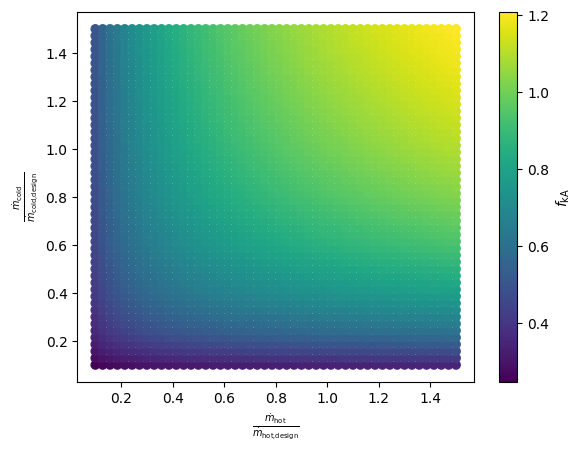

In [3]:
fig, ax = plt.subplots(1)


im = ax.scatter(x=m_ratios_hot, y=m_ratios_cold, c=result)
cax = plt.colorbar(im)
cax.set_label(r"$f_\text{kA}$")
ax.set_ylabel(r"$\frac{\dot m_\text{cold}}{\dot m_\text{cold,design}}$")
ax.set_xlabel(r"$\frac{\dot m_\text{hot}}{\dot m_\text{hot,design}}$")